# Project Objective

In this python jupyter notebook we are aiming to detecting Pneumonia from Chest X-Rays with Deep Learning. We will be creating a different deep learning model which will actually tell us whether the person is having pneumonia disease or not having pneumonia.

# Description of the Pneumonia Dataset

In [1]:
import os

root_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray'
print(f"Getting the count of images present in {root_dir}\n")

# Initialize a counter for total image files
total_image_count = 0
# Walk through the directory
for dirname, _, filenames in os.walk(root_dir):
    # Filter out only image files (case-insensitive check)
    image_files = [f for f in filenames if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    
    # If there are image files in the folder, print the folder name and the count
    if image_files:
        print(f"{dirname}, No. of Images: {len(image_files)}")
    
    # Accumulate the total count of image files
    total_image_count += len(image_files)

# Print the total count of image files
print(f"\nTotal number of image files: {total_image_count}")

Getting the count of images present in /kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA, No. of Images: 8
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL, No. of Images: 8
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA, No. of Images: 390
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL, No. of Images: 234
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA, No. of Images: 3875
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL, No. of Images: 1341

Total number of image files: 5856


# Dataset insight 
Here in the DATASETS of chest-xray-pneumonia >> chest_xray. 
There are three folder each with folder name are as below, which further contain two folder with image class of NORMAL and PNEUMONIA. All the images having .jpeg extention.
1. Train folder
* PNEUMONIA : 3875
* NORMAL : 1341
2. Test folder
* PNEUMONIA : 390
* NORMAL : 234
3. Val folder
* PNEUMONIA : 8
* NORMAL : 8


In [2]:
import os

# Define the directory path
dir_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray'

# Define the extensions to count
extensions = ('.png', '.jpg', '.jpeg')

# Initialize a dictionary to store the count of each extension
extension_count = {ext: 0 for ext in extensions}

# Walk through the directory and its subdirectories
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        # Check if the file has one of the specified extensions (case-insensitive)
        if filename.lower().endswith(extensions):
            # Get the file extension
            ext = os.path.splitext(filename)[1].lower()
            # Increment the count for the corresponding extension
            extension_count[ext] += 1

# Print the count of files for each extension
for ext, count in extension_count.items():
    print(f"Number of {ext} files: {count}")

Number of .png files: 0
Number of .jpg files: 0
Number of .jpeg files: 5856


# Importing library


In [10]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sn
print("Imported necessary libraries...")

Imported necessary libraries...


# Loading Data
Defining function for loading data from the Train, Test and Validation folder.

In [2]:
# function to dataset

labels = ['PNEUMONIA', 'NORMAL']

def Get_data(data_dir):
    data = [] 
    label_data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            if img.endswith('.jpeg'):
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                data.append([img_arr])
                label_data.append(class_num)
            else:
                continue
    return data,label_data

def Summary(X,y):
    print(f"Total images: {len(X)}")
    print(f"Total labels: {len(y)}")
    print(f"Total count of PNEUMONIA images: {y.count(0)}")
    print(f"Total count of NORMAL images: {y.count(1)}")

In [8]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

print("Loaded images in X_train, y_train. Summary of .jpeg image")
X_train, y_train = Get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train')
Summary(X_train, y_train)

print("Loaded images in X_val , y_val. Summary of .jpeg image")
X_val , y_val = Get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val')
Summary(X_val,y_val)

print("Loaded images in X_test, y_test. Summary of .jpeg image")
X_test, y_test = Get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test')
Summary(X_test, y_test)

Loaded images in X_train, y_train. Summary of .jpeg image
Total images: 5216
Total labels: 5216
Total count of PNEUMONIA images: 3875
Total count of NORMAL images: 1341
Loaded images in X_val , y_val. Summary of .jpeg image
Total images: 16
Total labels: 16
Total count of PNEUMONIA images: 8
Total count of NORMAL images: 8
Loaded images in X_test, y_test. Summary of .jpeg image
Total images: 624
Total labels: 624
Total count of PNEUMONIA images: 390
Total count of NORMAL images: 234


# Image plotting and visualisation with label

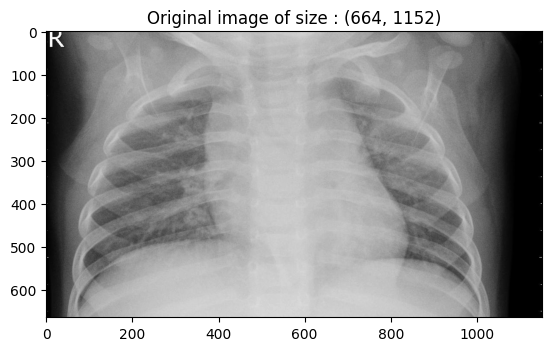

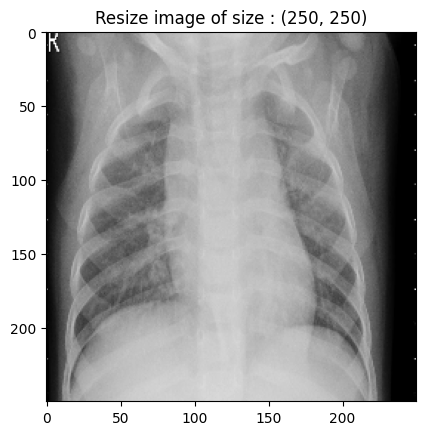

In [9]:
img = X_val[0][0]
plt.imshow(img, cmap='gray')
plt.title(f"Original image of size : {np.array(X_val[0][0]).shape}")
plt.show()

img_size = 250
img_resized = cv2.resize(img, (img_size, img_size))
plt.imshow(img_resized, cmap='gray')
plt.title(f"Resize image of size : ({img_size}, {img_size})")
plt.show()

# Evaluation Matrix
It basically print test Accuracy, precision, recall, F1-score and plot Confusion matrix.

In [17]:
def Confusion_Plot(y_pred,y_test):
    conf = tf.math.confusion_matrix(labels = y_test, predictions = y_pred )
    sn.heatmap(conf,annot=True,fmt='d')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title('Confusion Matrix plot')
    plt.show()

def Evaluation_matrix(y_pred,y_test):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")  
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall:.4f}")
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.4f}")
    #Plotting Confusion matrix
    Confusion_Plot(y_pred,y_test)

# Deep Learning Models
Here are the different deep-learning models 

1. Convolutional Neural Network (CNN)
2. Convolutional Neural Network (CNN) with ImageDataGenerator
3. Convolutional Neural Network (CNN) with VGG16


In [3]:
# Loading the data into the X_train,X_test,X_val,y_train,y_test,y_val
# Defining function to resize the image size to build model
img_size = 150
def Resize_Img(X):
    img_resized = []
    for img in X:
        img= img[0]
        img_resize = cv2.resize(img, (img_size,img_size))
        img_resized.append(img_resize)
        
    return np.array(img_resized)

# Loading and resizing the Dataset
X_train, y_train = Get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train')
X_train = Resize_Img(X_train)
y_train = np.array(y_train)
print(f'Train image dataset loaded and resized to {img_size}X{img_size}.')

X_val , y_val = Get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val')
X_val = Resize_Img(X_val)
y_val = np.array(y_val)
print(f'Val image dataset loaded and resized to {img_size}X{img_size}.')

X_test, y_test = Get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test')
X_test = Resize_Img(X_test)
y_test = np.array(y_test)
print(f'Test image dataset loaded and resized to {img_size}X{img_size}.')


Train image dataset loaded and resized to 150X150.
Val image dataset loaded and resized to 150X150.
Test image dataset loaded and resized to 150X150.


# 1). Convolutional Neural Network (Simple CNN)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 685ms/step - accuracy: 0.8162 - loss: 9.6929 - val_accuracy: 0.8750 - val_loss: 1.2568
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 683ms/step - accuracy: 0.9487 - loss: 1.0132 - val_accuracy: 0.8125 - val_loss: 1.1946
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 111s 683ms/step - accuracy: 0.9533 - loss: 0.7048 - val_accuracy: 0.6875 - val_loss: 1.5393
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 688ms/step - accuracy: 0.9555 - loss: 0.5399 - val_accuracy: 0.8750 - val_loss: 0.6739
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 112s 688ms/step - accuracy: 0.9718 - loss: 0.4004 - val_accuracy: 0.9375 - val_loss: 0.5427


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,484,104 (55.25 MB)

 Trainable params: 4,828,034 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,070 (36.83 MB)

624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
Test Accuracy: 0.7724
Precision: 0.9694
Recall: 0.4060
F1 Score: 0.5723


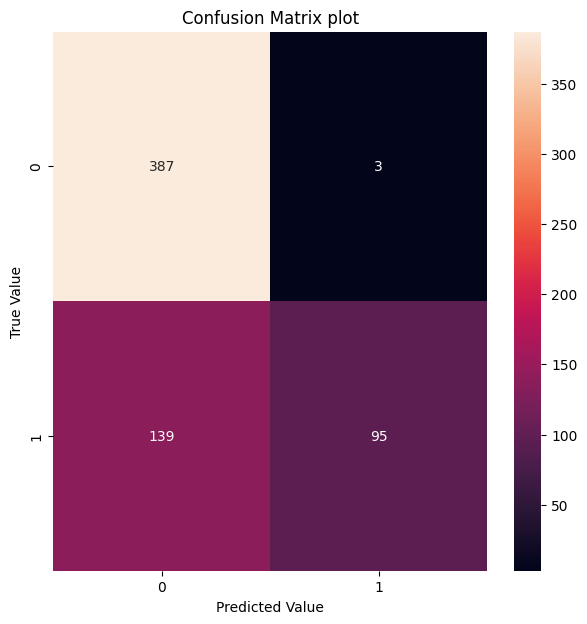

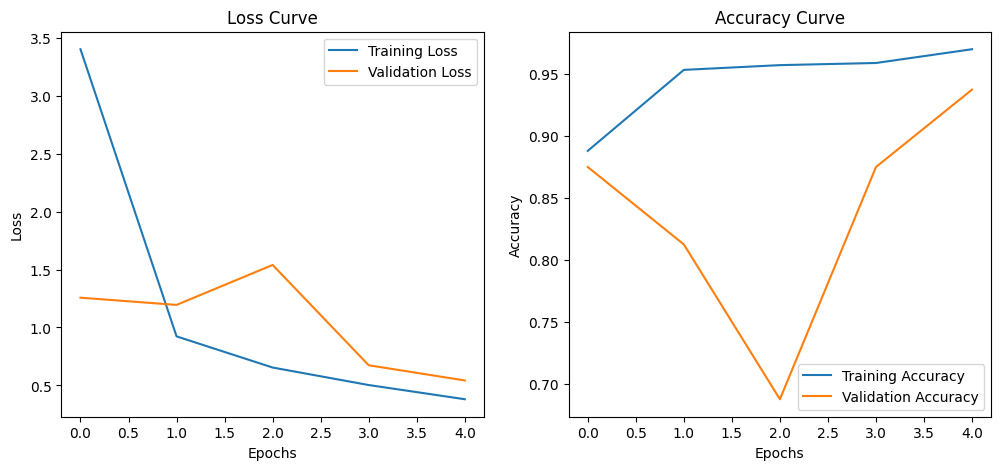

In [14]:
# Created the CNN Model
# img_size = 150
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add Early Stopping
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[early_stopping])

#Model Summary
model.summary()

# Evaluate the Model and Predict on the test data
y_pred_classes = model.predict(X_test, steps=len(X_test))

# Convert predictions to class labels (0 or 1)
y_pred = np.argmax(y_pred_classes, axis=1)

#Test Accuracy, precision, recall, F1-score and plot Confusion matrix.
Evaluation_matrix(y_pred,y_test)

# Extract loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the loss curve
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 2). Convolutional Neural Network (CNN) with ImageDataGenerator

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 116s 697ms/step - accuracy: 0.7147 - loss: 5.8337 - val_accuracy: 0.8125 - val_loss: 1.3025
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 721ms/step - accuracy: 0.8514 - loss: 1.0243 - val_accuracy: 0.8750 - val_loss: 0.9100
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 838ms/step - accuracy: 0.8306 - loss: 0.7743 - val_accuracy: 0.8125 - val_loss: 0.9250
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 730ms/step - accuracy: 0.8325 - loss: 0.6672 - val_accuracy: 0.8125 - val_loss: 0.8288
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 730ms/step - accuracy: 0.8314 - loss: 0.6105 - val_accuracy: 0.8750 - val_loss: 0.6335


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,484,104 (55.25 MB)

 Trainable params: 4,828,034 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,070 (36.83 MB)

624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
Test Accuracy: 0.7420
Precision: 0.6667
Recall: 0.6239
F1 Score: 0.6446


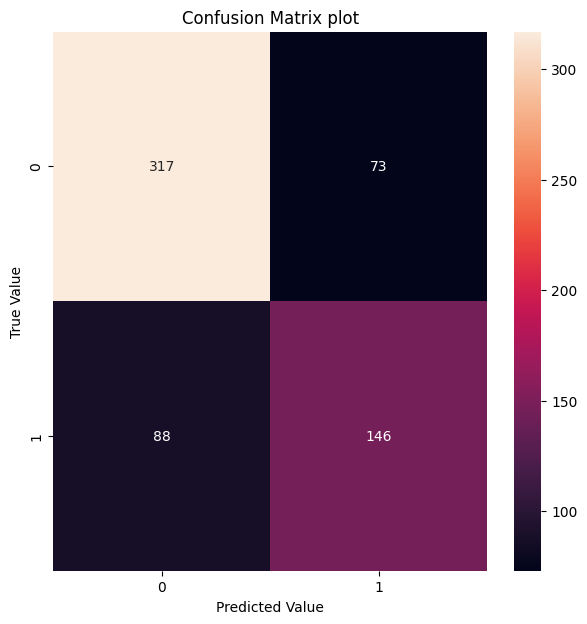

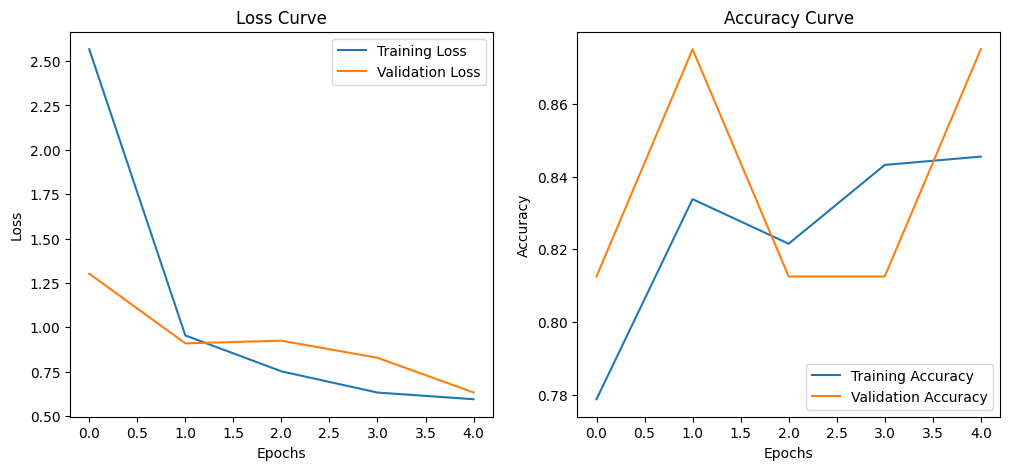

In [15]:

# Add a channel dimension for grayscale images
X_train = np.expand_dims(X_train, axis=-1)  # Shape becomes (5216, 150, 150, 1)
X_val = np.expand_dims(X_val, axis=-1)      # Shape becomes (val_samples, 150, 150, 1)
X_test = np.expand_dims(X_test, axis=-1)    # Shape becomes (test_samples, 150, 150, 1)

# Define the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

# Fit the ImageDataGenerator on the Validation data
datagen.fit(X_val)

# Fit the ImageDataGenerator on the testing data
datagen.fit(X_test)

# Define the CNN model
# img_size = 150
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train), epochs=5, validation_data=(X_val, y_val))

model.summary()

# Evaluate the Model and Predict on the test data
y_pred_classes = model.predict(X_test, steps=len(X_test))

# Convert predictions to class labels (0 or 1)
y_pred = np.argmax(y_pred_classes, axis=1)

#Test Accuracy, precision, recall, F1-score and plot Confusion matrix.
Evaluation_matrix(y_pred,y_test)

# Extract loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the loss curve
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 3). Convolutional Neural Network (CNN) with VGG16

In [16]:
# Define image size for VGG16
IMAGESHAPE = [224, 224, 3]  # VGG16 requires 224x224 RGB images

# Load VGG16 model with pre-trained weights, excluding the top layers
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

# Freeze all layers in VGG16 to prevent them from being trained
for each_layer in vgg_model.layers:
    each_layer.trainable = False

# Determine the number of classes from the training directory
classes = ['Normal', 'Pneumonia']  # Assumes each class is a subdirectory in 'train'

# Add a Flatten layer and a Dense layer for classification
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(len(classes), activation='softmax')(flatten_layer)

# Create the final model by combining VGG16 and the new layers
final_model = Model(inputs=vgg_model.input, outputs=prediction)

# Display the model summary
final_model.summary()

# Compile the model with Adam optimizer and categorical crossentropy loss
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Set up ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Apply random shearing
    zoom_range=0.2,  # Apply random zoom
    horizontal_flip=True  # Flip images horizontally
)

# Set up ImageDataGenerator for validation and testing (only normalization)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
training_set = train_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=4,
    class_mode='categorical'  # Use categorical labels
)

# Load validation data
validation_set = test_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/val',  # Assuming there's a validation directory
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical'
)

# Load testing data
test_set = test_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical'
)

# Train the model
fitted_model = final_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

# Evaluate the Model and Predict on the test data
y_pred_classes = final_model.predict(X_test, steps=len(X_test))

# Convert predictions to class labels (0 or 1)
y_pred = np.argmax(y_pred_classes, axis=1)

#Test Accuracy, precision, recall, F1-score and plot Confusion matrix.
Evaluation_matrix(y_pred,y_test)


# Plot the training and validation loss
plt.plot(fitted_model.history['loss'], label='Training Loss')
plt.plot(fitted_model.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(fitted_model.history['accuracy'], label='Training Accuracy')
plt.plot(fitted_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 111/1304 ━━━━━━━━━━━━━━━━━━━━ 22:11 1s/step - accuracy: 0.7991 - loss: 0.5748

KeyboardInterrupt: 

# Final Result : Deep Learning Models
Here are the different deep-learning models with test accuracy and model summary

1. Convolutional Neural Network (CNN): Test Accuracy: 0.7596
The model is build using image of size 150x150 pixel in gray scale without data/image augmentation or image data generator.
The CNN model architecture is summaries as follow:

2. Convolutional Neural Network (CNN) with ImageDataGenerator: Test Accuracy: 0.6795
The model is build using image of size 150x150 pixel in gray scale with data/image augmentation or image data generator in the train, test and validation dataset.
The CNN model architecture is summaries as follow:

3. Convolutional Neural Network (CNN) with VGG16: Test Accuracy: 0.8990
The model is build using image of size 150x150 pixel in gray scale without data/image augmentation or image data generator.
The CNN model architecture is summaries as follow:


